## 4.4 評估


In [1]:
# 取得中文字型
!wget 'https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf'

--2021-12-24 02:01:53--  https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf [following]
--2021-12-24 02:01:53--  https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2021-12-24 02:01:53 

In [2]:
# 共通事前處理

# 隱藏不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 匯入必要的函式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

# 用來顯示資料框的函式
from IPython.display import display

# 調整顯示選項
# NumPy 的浮點數表示精度
np.set_printoptions(suppress=True, precision=4)
# pandas 中的浮點數表示精度
pd.options.display.float_format = '{:.4f}'.format
# 顯示資料框中的所有項目
pd.set_option("display.max_columns",None)
# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14
# 指定圖形的預設字型
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'
# 隨機種子
random_seed = 123

### 4.4.1 混淆矩陣

#### 混淆矩陣

In [3]:
# 從載入資料到分割資料

# 匯入套件
from sklearn.datasets import load_breast_cancer

# 載入資料
cancer = load_breast_cancer()

# 輸入資料 x
x = cancer.data

# 標準答案 y
# 將值變更為良性：0 惡性：1
y = 1- cancer.target

# 將輸入資料縮減至 2 維
x2 = x[:,:2]

# (4) 分割資料
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2, y, 
    train_size=0.7, test_size=0.3, random_state=random_seed)

In [4]:
# 從選擇演算法到評估為止

# 選擇演算法（邏輯斯迴歸）
from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

# 訓練
algorithm.fit(x_train, y_train)

# 預測
y_pred = algorithm.predict(x_test)

# 評估
score = algorithm.score(x_test, y_test)

# 確認結果
print(f'score: {score:.4f}')

score: 0.8772


In [5]:
# 混淆矩陣的計算

# 匯入必要的套件
from sklearn.metrics import confusion_matrix

# 生成混淆矩陣
#   y_test: 驗證資料的標準答案
#   y_pred: 驗證資料的預測結果
matrix = confusion_matrix(y_test, y_pred)

# 確認結果
print(matrix)

[[101   2]
 [ 19  49]]


In [6]:
# 用於顯示混淆矩陣之函式

def make_cm(matrix, columns):
    # matrix numpy 陣列
    
    # columns 項目名稱列表
    n = len(columns)
    
    # 將 '標準答案' 重複 n 次以生成列表
    act = ['標準答案'] * n
    pred = ['預測結果'] * n
    
    # 生成資料框
    cm = pd.DataFrame(matrix, 
        columns=[pred, columns], index=[act, columns])
    return cm

In [7]:
# 利用 make_cm 顯示混淆矩陣
cm = make_cm(matrix, ['良性', '惡性'])
display(cm)

預測結果    
          良性  惡性
標準答案 良性  101   2
     惡性   19  49

### 4.4.2 正確率、精確性、召回率、F 分數

In [8]:
# 計算精確性、召回率與 F 分數

# 匯入函式庫
from sklearn.metrics import precision_recall_fscore_support

# 計算精確性、召回率與 F 分數
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_test, y_pred, average='binary', pos_label=1)

# 確認結果
print(f'精確性　: {precision:.4f}')
print(f'召回率　: {recall:.4f}')
print(f'F 分數　: {fscore:.4f}')

精確性　: 0.9608
召回率　: 0.7206
F 分數　: 0.8235


### 4.4.3 機率值與閥值

In [9]:
# 取得 P 值
y_proba = algorithm.predict_proba(x_test)
print(y_proba[:10,:])

[[0.9925 0.0075]
 [0.9981 0.0019]
 [0.0719 0.9281]
 [0.8134 0.1866]
 [0.0345 0.9655]
 [0.6376 0.3624]
 [0.9694 0.0306]
 [0.9743 0.0257]
 [0.76   0.24  ]
 [0.9775 0.0225]]


In [10]:
# 取得 positive(1) 的 P 值
y_proba1 = y_proba[:,1]

# 確認結果
print(y_test[10:20])
print(y_pred[10:20])
print(y_proba1[10:20])

[0 1 1 0 1 0 0 0 0 0]
[0 1 0 0 1 0 0 0 0 0]
[0.2111 0.9188 0.1617 0.0609 0.631  0.0549 0.0601 0.0506 0.0383 0.0164]


In [11]:
# 變更閥值
thres = 0.5
print((y_proba1[10:20] > thres).astype(int))

thres = 0.7
print((y_proba1[10:20] > thres).astype(int))

[0 1 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]


In [12]:
# 定義可以改變閥值的預測函式
def pred(algorithm, x, thres):
    # 取得機率值（矩陣）
    y_proba = algorithm.predict_proba(x)
    
    # 預測結果 1 的機率值
    y_proba1 =  y_proba[:,1]
    
    # 預測結果 1 的機率值 > 閾值
    y_pred = (y_proba1 > thres).astype(int)
    return y_pred

In [13]:
# 取得閾值為 0.5 的預測結果
pred_05 = pred(algorithm, x_test, 0.5)

# 取得閾值為 0.7 的預測結果
pred_07 = pred(algorithm, x_test, 0.7)

# 確認結果
print(pred_05[10:20])
print(pred_07[10:20])

[0 1 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]


### 4.4.4 PR 曲線與 ROC 曲線

#### PR 曲線

In [14]:
# 生成 PR 曲線的陣列

# 匯入套件
from sklearn.metrics import precision_recall_curve
# 取得精確性、召回率與閾值
precision, recall, thresholds = precision_recall_curve(
    y_test, y_proba1)
# 將結果轉換成資料框
df_pr = pd.DataFrame([thresholds, precision, recall]).T
df_pr.columns = ['閾值', '精確性', '召回率']
# 顯示閾值 0.5 附近的結果
display(df_pr[52:122:10])

,閾值,精確性,召回率
52,0.1473,0.7901,0.9412
62,0.2027,0.8310,0.8676
72,0.3371,0.9344,0.8382
82,0.5347,0.9608,0.7206
92,0.7763,0.9756,0.5882
102,0.9025,1.0000,0.4559
112,0.9829,1.0000,0.3088


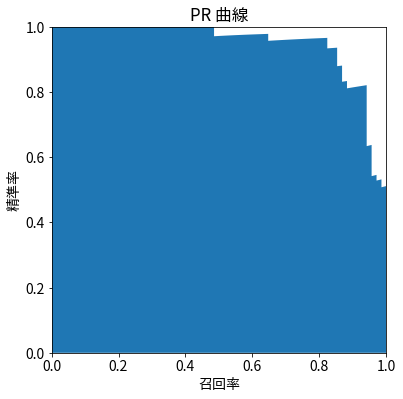

In [15]:
# 繪製 PR 曲線

# 設定圖形尺寸
plt.figure(figsize=(6,6))
# 將圖形區域上色
plt.fill_between(recall, precision, 0)
# 指定 x, y 的範圍
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# 顯示標籤與標題
plt.xlabel('召回率')
plt.ylabel('精準率')
plt.title('PR 曲線')
plt.show()

In [16]:
# 計算 PR 曲線下的面積
from sklearn.metrics import auc
pr_auc = auc(recall, precision)
print(f'PR 曲線下的面積 : {pr_auc:.4f}')

PR 曲線下的面積 : 0.9459


#### ROC 曲線

In [17]:
# 生成 ROC 曲線的陣列

# 匯入套件
from sklearn.metrics import roc_curve

# 取得偽陽性率、靈敏度與閾值
fpr, tpr, thresholds = roc_curve(
    y_test, y_proba1,drop_intermediate=True)

# 將結果轉換成資料框
df_roc = pd.DataFrame([thresholds, fpr, tpr]).T
df_roc.columns = ['閾值', '偽陽性率', '靈敏度']

# 顯示閾值 0.5 附近的結果
display(df_roc[21:91:10])

,閾值,偽陽性率,靈敏度
21,0.0225,0.6311,0.9853


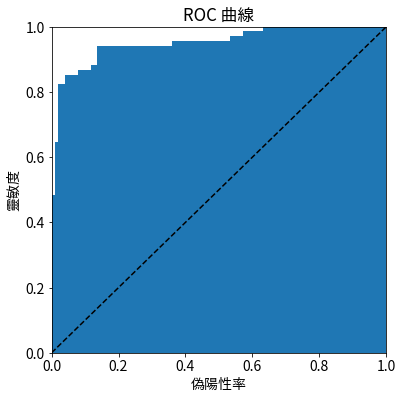

In [18]:
# 繪製 ROC 曲線

# 設定圖形尺寸
plt.figure(figsize=(6,6))

# 繪製虛線
plt.plot([0, 1], [0, 1], 'k--')

# 將圖形區域上色
plt.fill_between(fpr, tpr, 0)

# 指定 x, y 的範圍
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# 顯示標籤與標題
plt.xlabel('偽陽性率')
plt.ylabel('靈敏度')
plt.title('ROC 曲線')
plt.show()

In [19]:
# 計算 ROC 曲線下面積
roc_auc = auc(fpr, tpr)
print(f'ROC 曲線下面積 : {roc_auc:.4f}')

ROC 曲線下面積 : 0.9522


#### 繪製高正確率模型的 ROC 曲線

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
  x, y, train_size=0.7, test_size=0.3, random_state=random_seed)
algorithm = LogisticRegression()
algorithm.fit(x_train, y_train)
y_pred = algorithm.predict(x_test)
y_proba1 = algorithm.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba1)

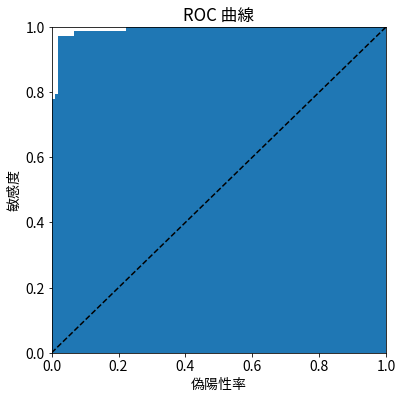

In [21]:
# 繪製 ROC 曲線

plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.fill_between(fpr, tpr, 0)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('偽陽性率')
plt.ylabel('敏感度')
plt.title('ROC 曲線')
plt.show()

In [22]:
# 計算 ROC 的 AUC
roc_auc = auc(fpr, tpr)
print(f'ROC 曲線下面積 : {roc_auc:.4f}')

ROC 曲線下面積 : 0.9921


### 4.4.5 輸入項目的重要性

#### 建立隨機森林的模型

In [23]:
# 建立隨機森林的模型

# 載入範例資料
import seaborn as sns
df_iris = sns.load_dataset("iris")
columns_i = ['萼片長度', '萼片寬度', '花瓣長度', '花瓣寬度', '品種']
df_iris.columns = columns_i

# 輸入資料 x
x = df_iris[['萼片長度', '萼片寬度', '花瓣長度', '花瓣寬度']]

# 標準答案 y
y = df_iris['品種']

# 選擇演算法（隨機森林）
from sklearn.ensemble import RandomForestClassifier
algorithm = RandomForestClassifier(random_state=random_seed)

# 訓練
algorithm.fit(x, y)

RandomForestClassifier(random_state=123)

#### 取得重要性向量

In [24]:
# 取得重要性向量
importances = algorithm.feature_importances_

# 以欄位名稱為鍵，生成 Series
w = pd.Series(importances, index=x.columns)

# 按值的大小排序
u = w.sort_values(ascending=False)

# 確認結果
print(u)

花瓣長度   0.4611
花瓣寬度   0.4257
萼片長度   0.0874
萼片寬度   0.0257
dtype: float64


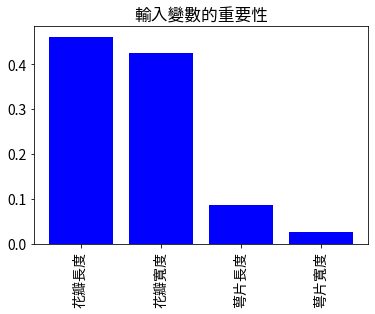

In [25]:
# 將重要性繪製成長條圖

# 繪製長條圖
plt.bar(range(len(u)), u, color='b', align='center')

# 顯示欄位名稱（90 度旋轉）
plt.xticks(range(len(u)), u.index, rotation=90)

# 顯示標題
plt.title('輸入變數的重要性')

plt.show()

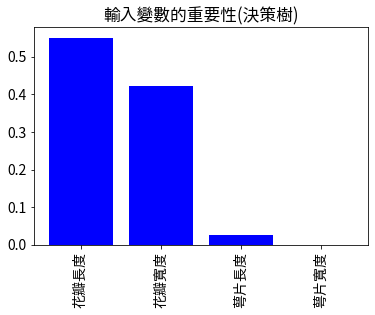

In [26]:
# 使用決策樹時

from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state=random_seed)
algorithm.fit(x, y)
importances = algorithm.feature_importances_
w = pd.Series(importances, index=x.columns)
u = w.sort_values(ascending=False)
plt.title('輸入變數的重要性(決策樹)')
plt.bar(range(len(u)), u, color='b', align='center')
plt.xticks(range(len(u)), u.index, rotation=90)
plt.show()

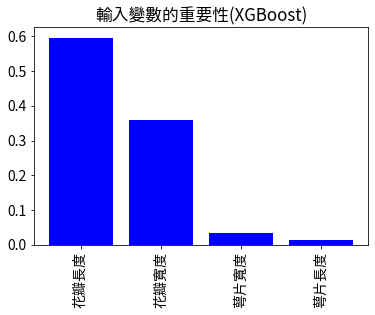

In [27]:
# 使用 XGBoost 時

import xgboost
algorithm = xgboost.XGBClassifier(random_state=random_seed)
algorithm.fit(x, y)
importances = algorithm.feature_importances_
w = pd.Series(importances, index=x.columns)
u = w.sort_values(ascending=False)
plt.title('輸入變數的重要性(XGBoost)')
plt.bar(range(len(u)), u, color='b', align='center')
plt.xticks(range(len(u)), u.index, rotation=90)
plt.show()

### 4.4.6 迴歸模型的評估方式

In [28]:
# 從載入資料到分割資料為止

# 載入資料（波士頓房地產資料集）
from sklearn.datasets import load_boston
boston = load_boston()

# df: 輸入資料
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# y: 標準答案
y = boston.target

# 只有　1　個欄位的輸入資料 建立　df1
df1 = df[['RM']]

# 確認結果
display(df.head())
display(df1.head())
print(y[:5])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


,RM
0,6.5750
1,6.4210
2,7.1850
3,6.9980
4,7.1470


[24.  21.6 34.7 33.4 36.2]


In [29]:
# 從選擇演算法到預測為止

# 演算法: XGBRegressor
from xgboost import XGBRegressor
algorithm1 = XGBRegressor(objective ='reg:squarederror',
    random_state=random_seed)

# 訓練 (輸入資料使用 df1)
algorithm1.fit(df1, y)

# 預測
y_pred1 = algorithm1.predict(df1)


# 演算法: XGBRegressor
from xgboost import XGBRegressor
algorithm2 = XGBRegressor(objective ='reg:squarederror',
    random_state=random_seed)

# 訓練 (輸入資料使用 df)
algorithm2.fit(df, y)

# 預測
y_pred2 = algorithm2.predict(df)

In [30]:
# 確認結果
print(f'y[:5] {y[:5]}')
print(f'y_pred1[:5] {y_pred1[:5]}')
print(f'y_pred2[:5] {y_pred2[:5]}')

y[:5] [24.  21.6 34.7 33.4 36.2]
y_pred1[:5] [25.438  20.3028 33.6333 31.4608 33.9829]
y_pred2[:5] [26.6479 22.2483 34.0721 34.315  35.4908]


In [31]:
# 計算 y 的最大值與最小值
y_range = np.array([y.min(), y.max()])

# 確認結果
print(y_range)

[ 5. 50.]


#### 繪製散佈圖

#### 只有 1 個輸入變數時

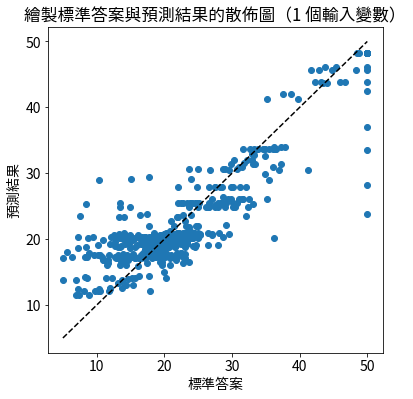

In [32]:
# 利用散佈圖確認結果（1 個輸入變數）

# 設定圖形尺寸
plt.figure(figsize=(6,6))

# 散佈圖
plt.scatter(y, y_pred1)

# 標準答案 = 預測結果的直線
plt.plot(y_range, y_range, 'k--')

# 顯示標籤與標題
plt.xlabel('標準答案')
plt.ylabel('預測結果')
plt.title('繪製標準答案與預測結果的散佈圖（1 個輸入變數）')

plt.show()

#### 有 13 個輸入欄位時

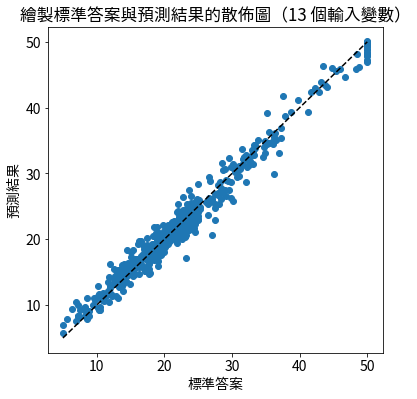

In [33]:
# 利用散佈圖確認結果（13 個輸入變數）

# 設定圖形尺寸
plt.figure(figsize=(6,6))

# 散佈圖
plt.scatter(y, y_pred2)

# 標準答案 = 預測結果的直線
plt.plot(y_range, y_range, 'k--')

# 顯示標籤與標題
plt.xlabel('標準答案')
plt.ylabel('預測結果')
plt.title('繪製標準答案與預測結果的散佈圖（13 個輸入變數）')

plt.show()

#### R2 score

In [34]:
# 計算 r2 分數（1 個輸入變數）
from sklearn.metrics import r2_score
r2_score1 = r2_score(y, y_pred1)
print(f'R2 score(1 個輸入變數) : {r2_score1:.4f}')

R2 score(1 個輸入變數) : 0.7424


In [35]:
# 計算 r2 分數（13 個輸入變數）
r2_score2 = r2_score(y, y_pred2)
print(f'R2 score(13 個輸入變數) : {r2_score2:.4f}')

R2 score(13 個輸入變數) : 0.9720
